<a href="https://colab.research.google.com/github/SamH3pn3r/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [50]:
sales = [3505,2400,3027,2798,3700,3250,2689]
avg = (sum(sales))/len(sales)

sq_diff = [(sales[0]-avg)**2, (sales[1]-avg)**2, (sales[2]-avg)**2, (sales[3]-avg)**2,
              (sales[4]-avg)**2, (sales[5]-avg)**2, (sales[6]-avg)**2]
sum_sqdiff = sum(sq_diff)
var = sum_sqdiff/(len(sq_diff)-1)

std = (var)**(1/2)


print("The mean:", avg)
print("The variance:", var)
print("The standard deviation:", std)

The mean: 3052.714285714286
The variance: 214387.90476190473
The standard deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [42]:
cust = [127, 80, 105, 92, 120, 115, 93]

data = {"Sales": sales, "Customers": cust}

import pandas as pd
df = pd.DataFrame(data)
print(df)

df.cov()

   Sales  Customers
0   3505        127
1   2400         80
2   3027        105
3   2798         92
4   3700        120
5   3250        115
6   2689         93


,Sales,Customers
Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [60]:
cust_avg = sum(cust)/len(cust)
s_sqdiff = [(cust[0]-cust_avg)**2, (cust[1]-cust_avg)**2, (cust[2]-cust_avg)**2,
            (cust[3]-cust_avg)**2, (cust[4]-cust_avg)**2, (cust[5]-cust_avg)**2,
            (cust[6]-cust_avg)**2]

s_var = sum(s_sqdiff)/(len(s_sqdiff)-1)

s_std = (s_var)**(1/2)

prod_std = (std)*(s_std)

r = df.cov()/prod_std

r

,Sales,Customers
Sales,27.144959,0.962834
Customers,0.962834,0.036839


In [52]:
df.corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


We will be unable to get the diagonal to be 1's because the product of the std is not big enough. 

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [76]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df_1 = pd.read_csv(url)

df_1 = df_1.drop(columns='Unnamed: 0')

df_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [83]:
df_2 = pd.DataFrame({"pclass": df_1['pclass'], "survived": df_1['survived'],
                    "age": df_1['age'], "sibsp": df_1['sibsp'], 
                     "parch": df_1['parch'], "ticket": df_1['ticket'], 
                     "fare": df_1['fare'], "body": df_1['body'], "has cabin number": df_1['has_cabin_number']})
df_2.cov()

,pclass,survived,age,sibsp,parch,fare,body,has cabin number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has cabin number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [84]:
df_2.corr()

,pclass,survived,age,sibsp,parch,fare,body,has cabin number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has cabin number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 1.5)

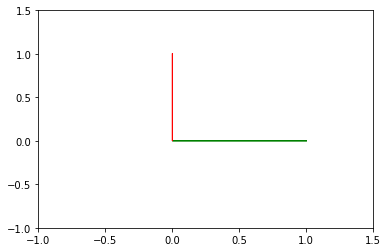

In [87]:
import matplotlib.pyplot as plt

plt.arrow(0, 0, 1, 0, color='g')
plt.arrow(0, 0, 0, 1, color='r')

plt.xlim(-1,1.5)
plt.ylim(-1,1.5)

A synonym for orthogonal is perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5,3,7]
b = [6, -8,2]

In [91]:
import numpy as np 
dot = np.dot(a,b)
print(dot)

-40


They are not orthogonal since the dot product is not equal to 0.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [95]:
c = [2,-15,6,20]
sqrNorm = (np.linalg.norm(c))**2
c_dot = np.dot(c,c)
cT_c = np.matmul(np.transpose(c), c)

print("The norm of c squared:", sqrNorm)
print("c dot c:", c_dot)
print("c transpose c:", cT_c)

The norm of c squared: 665.0
c dot c: 665
c transpose c: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align} 
d = 7 \begin{bmatrix} 1 \\ 0 
\end{bmatrix}
+ 12 \begin{bmatrix} 0 \\ 1
\end{bmatrix}
\end{align}

\begin{align} 
e=2\begin{bmatrix} 1 \\ 0 \\ 0
\end{bmatrix}
+ 11\begin{bmatrix} 0 \\ 1 \\ 0
\end{bmatrix}
- 8 \begin{bmatrix} 0 \\ 0 \\ 1
\end{bmatrix}
\end{align}
              

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [97]:
f = [4, 12, 11, 9, 2]
normF = np.linalg.norm(f)

unit_f = [f[0]/normF, f[1]/normF, f[2]/normF, f[3]/normF, f[4]/normF]
unit_f

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-2, 3)

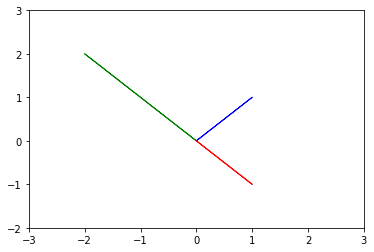

In [105]:
a = [-2, 2]
b = [1,1]
c = [1, -1]

plt.arrow(0, 0, a[0], a[1], color = 'g')
plt.arrow(0, 0, b[0], b[1], color = 'b')
plt.arrow(0, 0, c[0], c[1], color = 'r')



plt.xlim(-3,3)
plt.ylim(-2,3)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Since these vectors are linearly dependent, they will not be able to produce anything off the line y = 2x. So the span of g and h is y = 2x.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Since these vectors are linearly independent and each row is linearly indepedent, so these vectors span all of $\mathbb{R}^3$ .

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(0, 16)

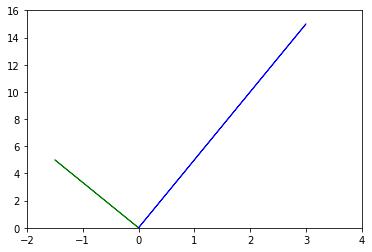

In [108]:
plt.arrow(0, 0, -1.5, 5, color='g')
plt.arrow(0, 0, 3, 15, color='b')

plt.xlim(-2, 4)
plt.ylim(0,16)

## 6.2 What does it mean to form a basis?

To form the basic vectors you need to cover the entire real space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Rank of P is equal to 3.

## 7.2 What does the rank of a matrix tell us?

How many rows are linearly independent and how many are linearly dependent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

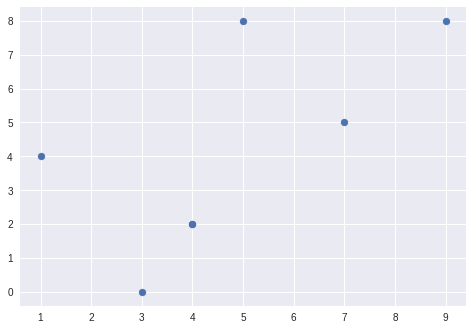

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()